In [1]:
#import require libraries:

# *** Should we import these inside functions mixed eview on practices as it is dire to program but if functiond pulled out ad implemented in other code will require this 
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
import re
import os
import json
import codecs
import ast

from os import path
#import word and regex functions for checking 
from RegEx_Checker_UT import check_lines_for_patterns
# from unit_testing_nonallowedwords import checkword

In [2]:
#parameters for disallowed list and url 
disallowedTermsListURL = "disallowedTermsList.csv"
patternListURL = "regexPatterns.csv"
notebookListURL ="notebooklist.csv"
#updateable csv to hold list of regex can we check csv or list implementation against this what is client preference ? 
#while loop while true use csv whilst false use list 

In [3]:
def readNotebook(notebookToReadPath):
    try:
                file = codecs.open(notebookToReadPath, "r")
                source = file.read()
                y = json.loads(source)
                currentNotebook = []
                for x in y['cells']:
                    for x2 in x['source']:
                        currentNotebook.append(x2)
                
                return currentNotebook
    except:
        print("Can't read file")
        return False

In [4]:
import re

# Check inpout lines against input patterns/rules
def check_lines_for_patterns(patternList, line):
    outputList = {pattern : 0 for pattern in patternList}
    # Return if the line matches the current pattern
    for pattern in patternList:
        searchResults = re.findall(pattern, line)
        if len(searchResults) > 0:
            outputList[pattern] = len(searchResults)
    return outputList

    
    # # If no line matches a pattern/rule, the output list will be empty
    # if not output_list:
    #     print("No lines matched any rules!")
    # else:
    #     # Output list to be returned
    #     return(output_list)


In [5]:
#forbidden words function
def checkTerms(line, deniedTerms): 
    import re
    #denied terms = list of terms to be checked e.g ['this', 'style', 'layout']
    #line takes any line to be checked this format doesn't matter but prefers string
    terms_count = {term : 0 for term in deniedTerms}
    for term in deniedTerms:
                #loop through terms 
                if re.search(term,line, re.IGNORECASE):
                    #check term in line
                    terms_count[term] += 1
#                     print(terms_count) #to see this carried out line by line
    return terms_count

In [19]:
directory = path.dirname(__file__) if "__file__" in locals() else os.getcwd()
#new way of reading compare against pandas - pandas is notebook specific which can be used innoteook checkerbut not used in normal functions 

#notebook checker function 
def notebookChecker(disallowedTermsListURL, patternListURL, notebookListURL):
    disallowedTermss = pd.read_csv(path.join(directory, disallowedTermsListURL))
    sortedList = pd.DataFrame(disallowedTermss, columns=['index','word','weight'])
    sortedList = np.array(sortedList)
    termIndexKey = {} 
    termWeightKey = {}
    disallowedList = []
    overallTermCount = {}
    for item in sortedList:
        termIndexKey.update({item[1]:item[0]})
        termWeightKey.update({item[1]:item[2]})
        disallowedList.append(item[1])
        
        
    # print(f"index {termIndexKey} \n weight {termWeightKey}")
    # dictionary of word:rule_num and dictionary of word:weight

    patternList = pd.read_csv(path.join(directory, patternListURL))
    sortedPatternList = pd.DataFrame(patternList, columns=['index','pattern','weight'])
    sortedPatternList = np.array(sortedPatternList)
    patternIndexKey = {}
    patternWeightKey ={}
    
    disallowedPatternList = []
    #here we take the regex patterns and ad them to the list to be checked by regex function
    for item in sortedPatternList:
        patternIndexKey.update({item[1]:item[0]})
        patternWeightKey.update({item[1]:item[2]})
        disallowedPatternList.append(item[1])
    # print(disallowedPatternList)
    overallPatternCount = {pattern : 0 for pattern in disallowedPatternList}

    checkedNotebooks = {}
    
    notebookList = pd.read_csv(path.join(directory, notebookListURL))
    uncheckedNotebooks = np.array(notebookList)
    # print (f"\n Here we open and read the notebooks due to be open {uncheckedNotebooks} \n")
    

    #loop through files from list

    for uncheckedNotebook in uncheckedNotebooks:
        
        overallScore = 0
        notebook = {}
        # here we check line by line the the terms found which are added to a list 
        notebookToRead = str(f"{path.join(directory, uncheckedNotebook[0])}")
        contents = readNotebook(notebookToRead)
        
        lineNum = 1
        for item in sortedList:
            overallTermCount[item[1]] = 0
        
        overallTermCountByLine = {}
        overallPatternCountByLine = {}
        
        for contentLine in contents:
            # print(f"\n content line {contentLine} \n")
            termResults = checkTerms(contentLine, disallowedList)
            if termResults != False:
                # print(termResults)
                overallTermCountByLine[lineNum] = termResults
                for term in overallTermCount:
                    if termResults[term] > 0 :
                        overallTermCount[term] += termResults[term]
                        overallScore += termResults[term]
            else:
                overallTermCountByLine[lineNum] = 'none found'
            
            regExOutput = check_lines_for_patterns(disallowedPatternList, contentLine)
            overallPatternCountByLine[lineNum] = regExOutput
            for patternsFound in regExOutput:
                overallPatternCount[patternsFound] += regExOutput[patternsFound]
                overallScore += regExOutput[patternsFound]
            lineNum += 1
        print(uncheckedNotebook)
        print(overallTermCount)
        # print(overallPatternCount)
        # print(overallTermCountByLine)
        # # print(overallPatternCountByLine)
        print(overallScore)
        checkedNotebooks.update({str(uncheckedNotebook): {'overallScore': overallScore,'overallTermCount' : str(overallTermCount),'overallTermCountByLine' : str(overallTermCountByLine), 'overallPatternCount' : str(overallPatternCount),'overallPatternCountByLine' : str(overallPatternCountByLine)}})
  
        
    return checkedNotebooks 
        

notebookResults = notebookChecker(disallowedTermsListURL, patternListURL, notebookListURL)
# print(notebookResults)

['sample.ipynb']
{'security': 16, 'class': 9, 'people': 6, 'adhesion': 0}
44
['sample2.ipynb']
{'security': 8, 'class': 6, 'people': 4, 'adhesion': 0}
31


# Here we check results

In [26]:
totals = {}
print(notebookResults.keys())
for result in notebookResults:
    print(notebookResults[result].keys())
    
    totals[result] = notebookResults[result].get('overallScore')
    # return back to dictionary for graphs
# print(totals)


dict_keys(["['sample.ipynb']", "['sample2.ipynb']"])
dict_keys(['overallScore', 'overallTermCount', 'overallTermCountByLine', 'overallPatternCount', 'overallPatternCountByLine'])
dict_keys(['overallScore', 'overallTermCount', 'overallTermCountByLine', 'overallPatternCount', 'overallPatternCountByLine'])


<function matplotlib.pyplot.show(close=None, block=None)>

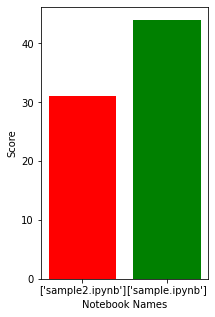

In [27]:
orderedResults = { nb:score for nb,score in sorted(totals.items(), key=lambda item:item[1])}

#PLot examples
f = plt.figure()
f.set_figwidth(3)
f.set_figheight(5)
plt.bar(range(len(orderedResults)),list(orderedResults.values()),align='center',color=['r','g','b'])
plt.xticks(range(len(orderedResults)),list(orderedResults.keys()))
plt.xlabel('Notebook Names')
plt.ylabel('Score')
plt.show

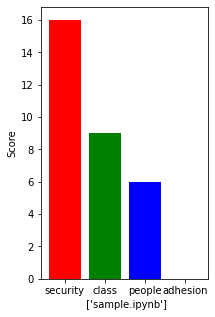

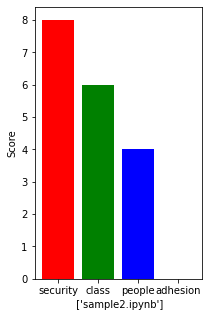

In [28]:
# make rule numbers
for result in notebookResults:
    terms = ast.literal_eval(notebookResults[result]['overallTermCount'])
    g = plt.figure()
    g.set_figwidth(3)
    g.set_figheight(5)
    plt.bar(range(len(terms)),list(terms.values()),align='center',color=['r','g','b'])
    plt.xticks(range(len(terms)),list(terms.keys()))
    plt.xlabel(f" {result}")
    plt.ylabel('Score')
    plt.show

In [ ]:
# make rule numbers 
for result in notebookResults:
    terms = notebookResults[result]['patternChecktotals'][result]['overallPatternCount']
    df = pd.DataFrame.from_dict(notebookResults[result]['patternChecktotals'][result]['overallPatternCount'], orient='index')
    print(f"{result}: \n {df}")
    g = plt.figure()
    g.set_figwidth(3)
    g.set_figheight(5)
    plt.bar(range(len(terms)),list(terms.values()),align='center',color=['r','g','b'])
    plt.xticks(range(len(terms)),list(terms.keys()))
    plt.xlabel(f" {result}")
    plt.ylabel('Score')
    plt.show